# Fatal Force

## Introduction and Setup

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter
import plotly.graph_objects as go

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

## Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# df_hh_income
print(df_hh_income.shape)
print(df_hh_income.columns)
print(f"No of ISNA: \n{df_hh_income.isna().sum()}")
print(f"No of duplicate rows: {df_hh_income.duplicated().sum()}")
df_hh_income.sample(5)

(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
No of ISNA: 
Geographic Area     0
City                0
Median Income      51
dtype: int64
No of duplicate rows: 0


,Geographic Area,City,Median Income
319,AL,Loxley town,48000
3074,CA,Riverside city,57196
9866,KY,Carrollton city,39784
25682,TX,Ovilla city,90000
10346,LA,Bawcomville CDP,25549


In [6]:
# df_pct_poverty
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)
print(f"No of ISNA: \n{df_pct_poverty.isna().sum()}")
print(f"No of duplicate rows: {df_pct_poverty.duplicated().sum()}")
df_pct_poverty.sample(5)

(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
No of ISNA: 
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
No of duplicate rows: 0


,Geographic Area,City,poverty_rate
18365,NC,Ivanhoe CDP,0
4625,FL,Matlacha CDP,11.4
24808,TX,Cisco city,27.3
3540,CO,Colorado City CDP,21.5
21138,OR,Adair Village city,13.4


In [7]:
# df_pct_completed_hs
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)
print(f"No of ISNA: \n{df_pct_completed_hs.isna().sum()}")
print(f"No of duplicate rows: {df_pct_completed_hs.duplicated().sum()}")

(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
No of ISNA: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
No of duplicate rows: 0


In [8]:
# df_share_race_city
print(df_share_race_city.shape)
print(df_share_race_city.columns)
print(f"No of ISNA: \n{df_share_race_city.isna().sum()}")
print(f"No of duplicate rows: {df_share_race_city.duplicated().sum()}")
df_share_race_city.sample(5)

(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
No of ISNA: 
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
No of duplicate rows: 0


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
7141,IL,St. Charles city,88.8,2.5,0.2,3.2,10.2
22468,PA,Morgantown CDP,94.4,0.2,0.1,2.3,2.5
25173,TX,Hutto city,71.9,14.3,0.8,1.4,30.8
16656,NM,Pastura CDP,87,0,0,0,82.6
28338,WI,Barronett CDP,95.5,0,0.9,0.9,3.6


In [9]:
# df_fatalities
print(df_fatalities.shape)
print(df_fatalities.columns)
print(f"No of ISNA: \n{df_pct_completed_hs.isna().sum()}")
print(f"No of duplicate rows: {df_pct_completed_hs.duplicated().sum()}")
df_fatalities.sample(5)

(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
No of ISNA: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
No of duplicate rows: 0


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
463,585,Richard LaPort,29/06/15,shot,gun,51.00,M,W,Edinburg,NY,True,attack,Not fleeing,False
375,472,Michael Lowery,22/05/15,shot,toy weapon,40.00,M,W,Somerset,PA,False,attack,Not fleeing,False
502,627,Neil White,09/07/15,shot and Tasered,Taser,38.00,M,W,Los Angeles,CA,False,attack,Other,False
1841,2057,Dontrell Montrese Carter,18/11/16,shot,gun,25.00,M,B,Ludowici,GA,False,attack,Not fleeing,False
832,978,John Allen,04/11/15,shot,gun,57.00,M,B,Houston,TX,False,attack,Car,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
# Only df_hh_income["Median Income"] as isna

df_hh_income[df_hh_income["Median Income"].isna() == True].replace(0, inplace=True)

In [11]:
df_hh_income["Median Income"].isna().sum()

51

## Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
# There are apparently incorrect values in these columns i.e NA and -
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty['poverty_rate'].fillna(0, inplace=True)

In [13]:
poverty_rate_per_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

poverty_rate_per_state.sort_values("poverty_rate", ascending=False, inplace=True)

poverty_rate_per_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51
18,LA,22.29
40,SC,22.11
49,WV,21.08
1,AL,20.61
36,OK,20.55


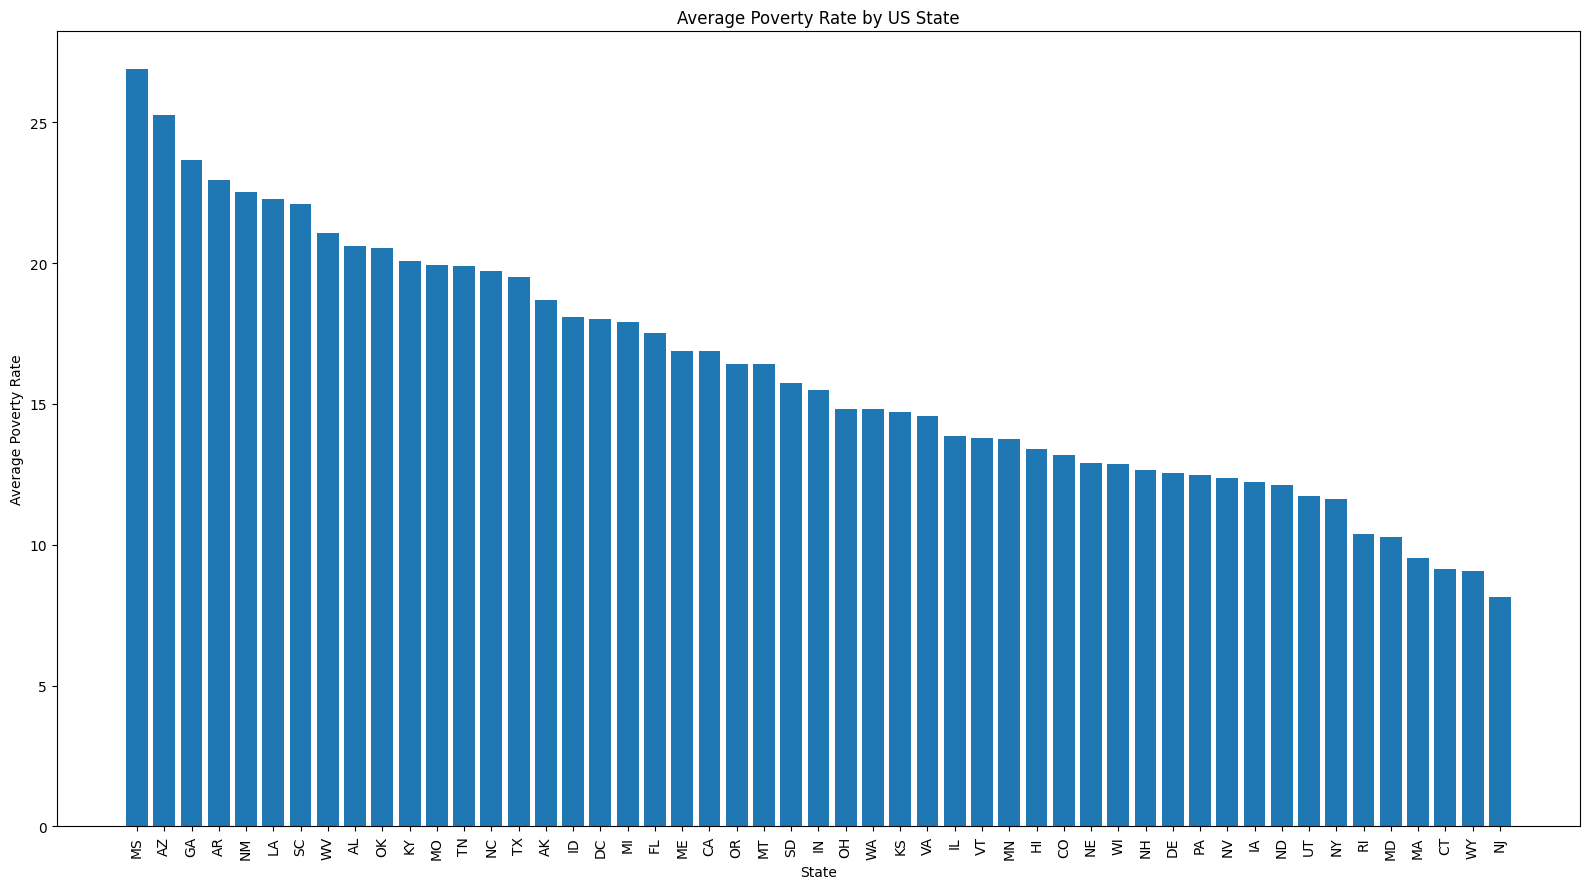

In [14]:
plt.figure(figsize=(16, 9))
plt.bar(poverty_rate_per_state["Geographic Area"], poverty_rate_per_state["poverty_rate"])
plt.xlabel('State')
plt.ylabel('Average Poverty Rate')
plt.title('Average Poverty Rate by US State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [15]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'].fillna(0, inplace=True)

In [16]:
graduation_rate_per_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()

graduation_rate_per_state.sort_values("percent_completed_hs", ascending=True, inplace=True)

graduation_rate_per_state

,Geographic Area,percent_completed_hs
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


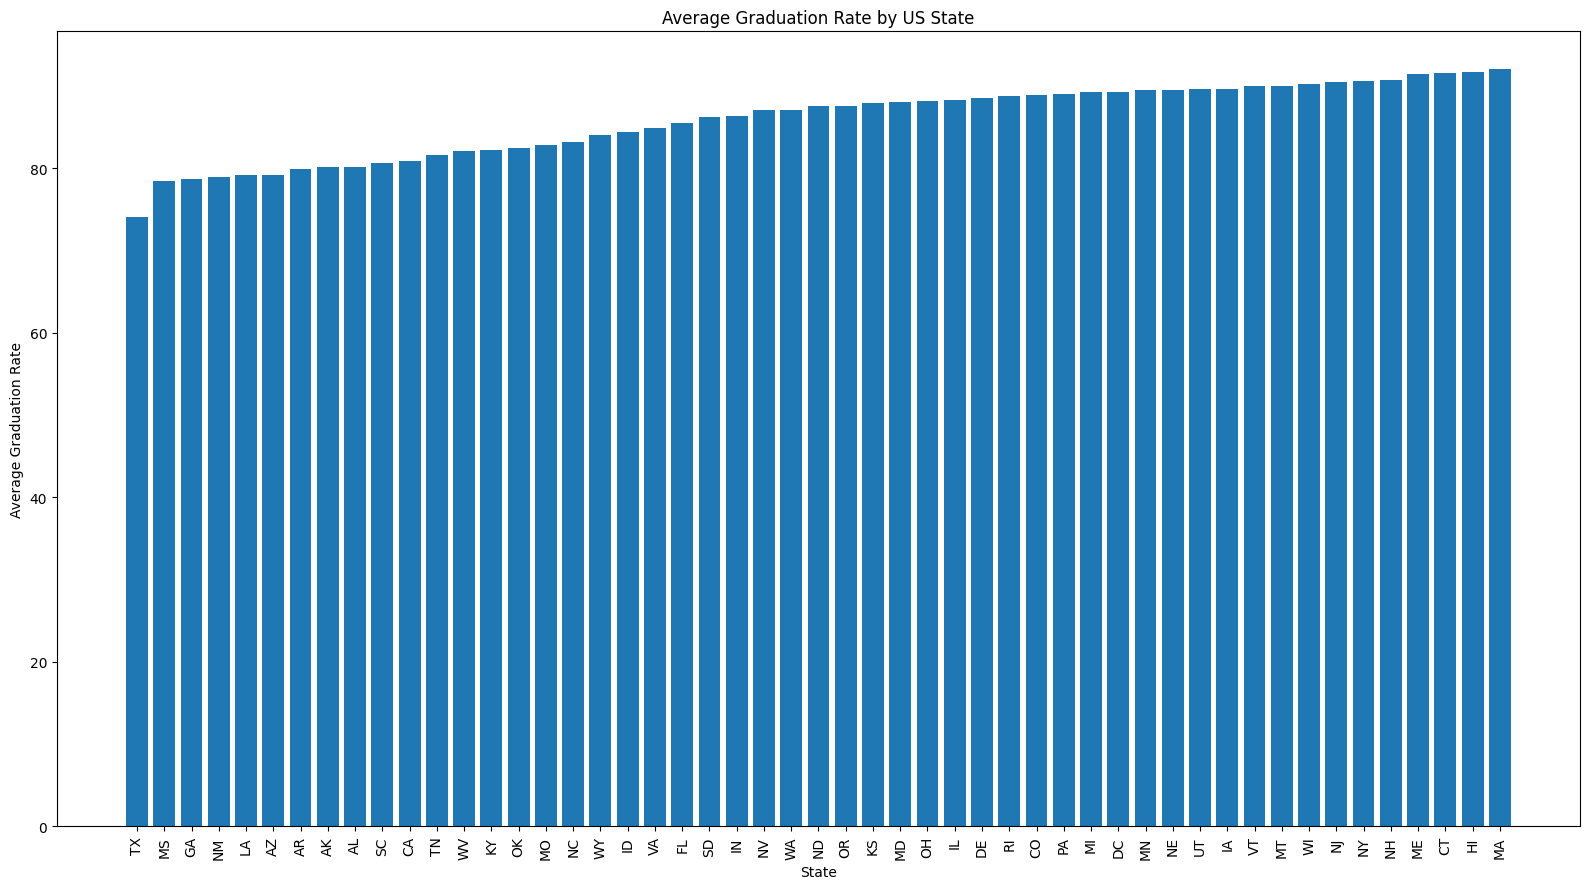

In [17]:
plt.figure(figsize=(16, 9))
plt.bar(graduation_rate_per_state["Geographic Area"], graduation_rate_per_state["percent_completed_hs"])
plt.xlabel('State')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by US State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualise the Relationship between Poverty Rates and High School Graduation Rates

### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

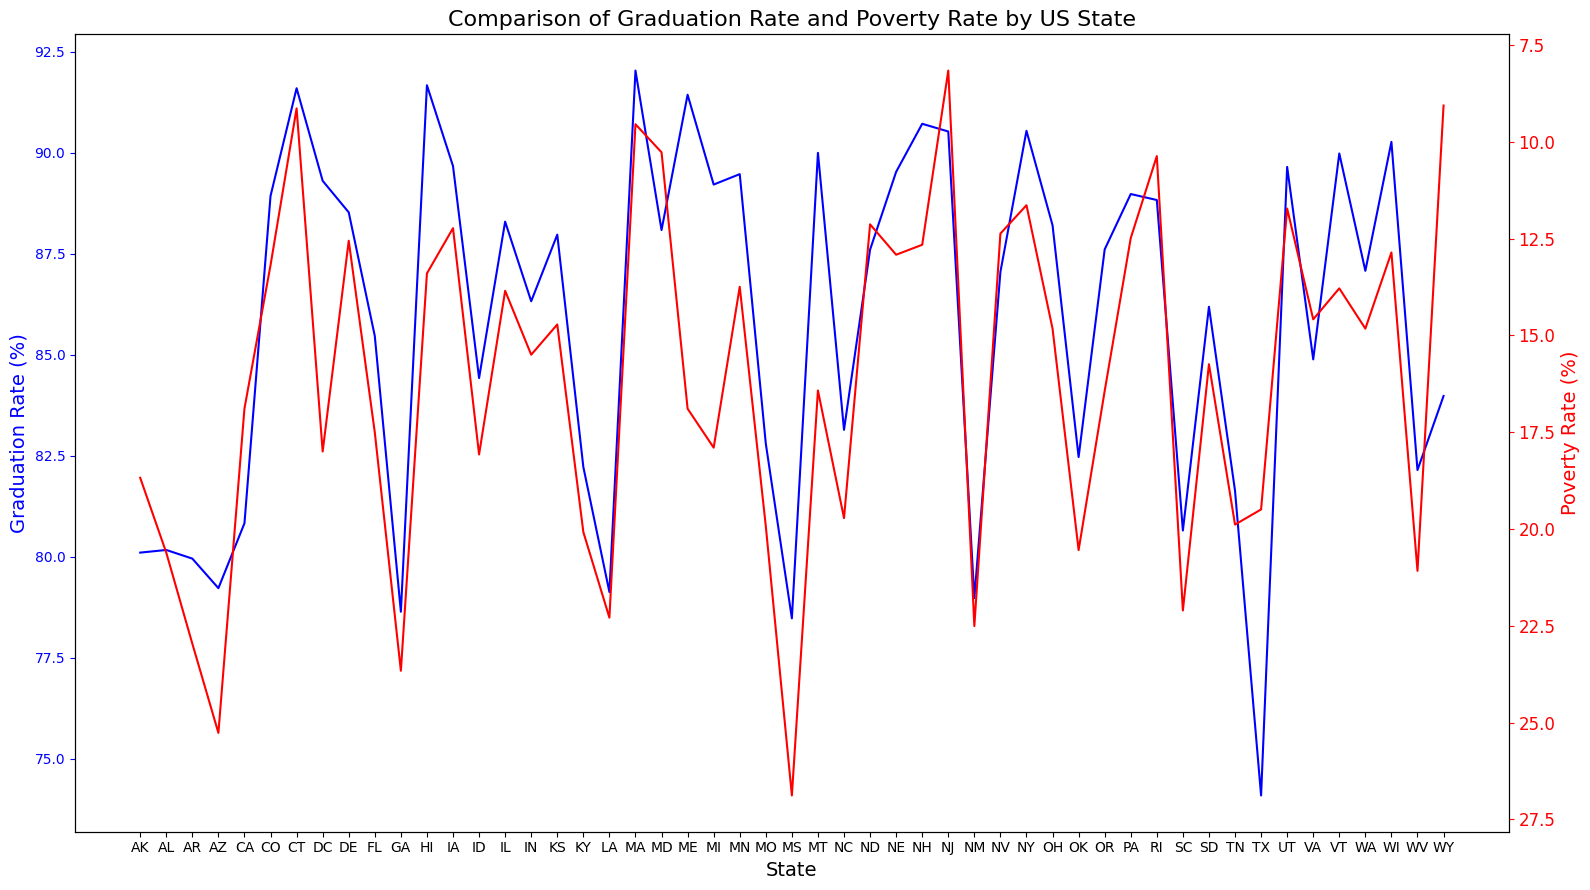

In [18]:
graduation_rate_per_state.sort_values("Geographic Area", ascending=True, inplace=True)
poverty_rate_per_state.sort_values("Geographic Area", ascending=True, inplace=True)

fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.plot(graduation_rate_per_state['Geographic Area'], graduation_rate_per_state['percent_completed_hs'], color='b', label='Graduation Rate')
ax1.set_xlabel('State', fontsize=14)
ax1.set_ylabel('Graduation Rate (%)', color='b', fontsize=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(poverty_rate_per_state['Geographic Area'], poverty_rate_per_state['poverty_rate'], color='r', label='Poverty Rate')
ax2.set_ylabel('Poverty Rate (%)', color='r', fontsize=14)
ax2.tick_params('y', colors='r')

ax2.set_ylim(ax2.get_ylim()[::-1]) # reverse the axis for the poverty rate

plt.title('Comparison of Graduation Rate and Poverty Rate by US State', fontsize=16)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [19]:
poverty_and_graduation_rates = pd.merge(poverty_rate_per_state, graduation_rate_per_state, on='Geographic Area', suffixes=('_poverty', '_graduation'))

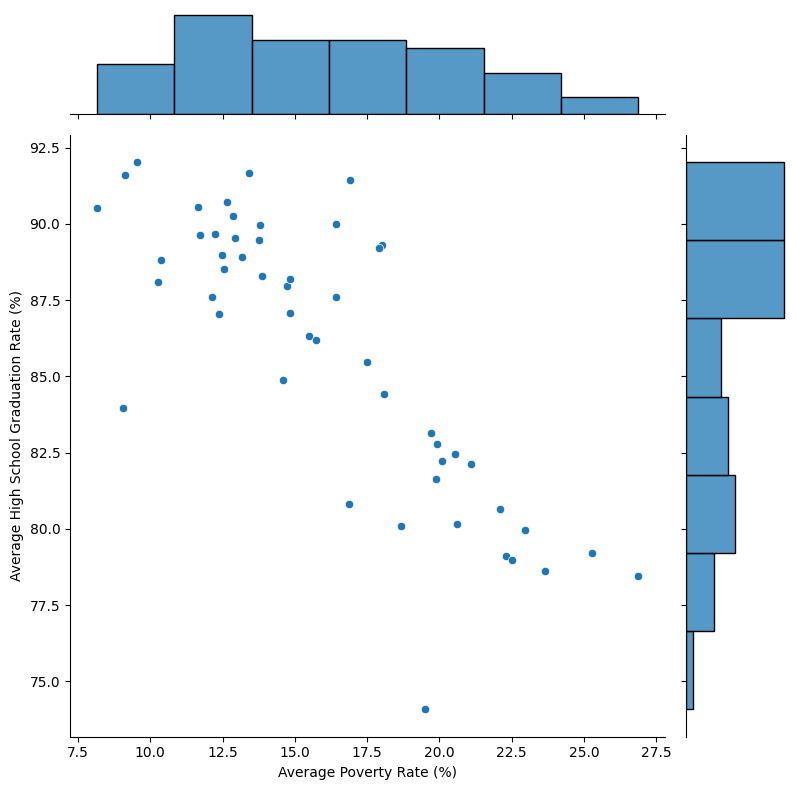

In [20]:
sns.jointplot(data=poverty_and_graduation_rates, x='poverty_rate', y='percent_completed_hs', kind='scatter', height=8)
plt.xlabel('Average Poverty Rate (%)')
plt.ylabel('Average High School Graduation Rate (%)')
plt.show()

### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

c:\Users\user\Documents\GitHub\100-Days-Of-Python\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


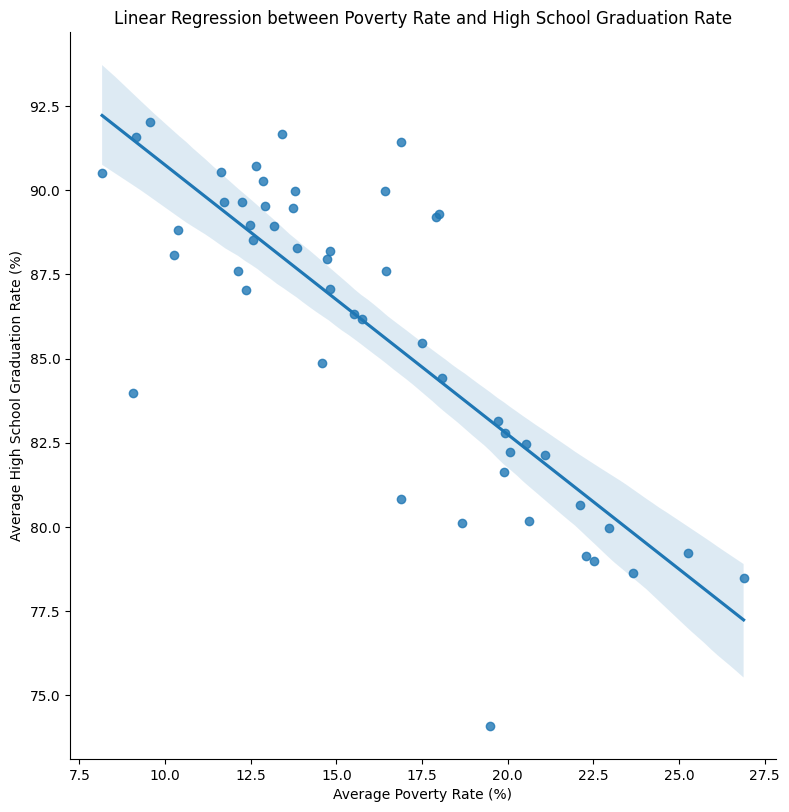

In [21]:
sns.lmplot(data=poverty_and_graduation_rates, x='poverty_rate', y='percent_completed_hs', height=8)
plt.xlabel('Average Poverty Rate (%)')
plt.ylabel('Average High School Graduation Rate (%)')
plt.title('Linear Regression between Poverty Rate and High School Graduation Rate')
plt.show()

## Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [22]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

In [23]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})

racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


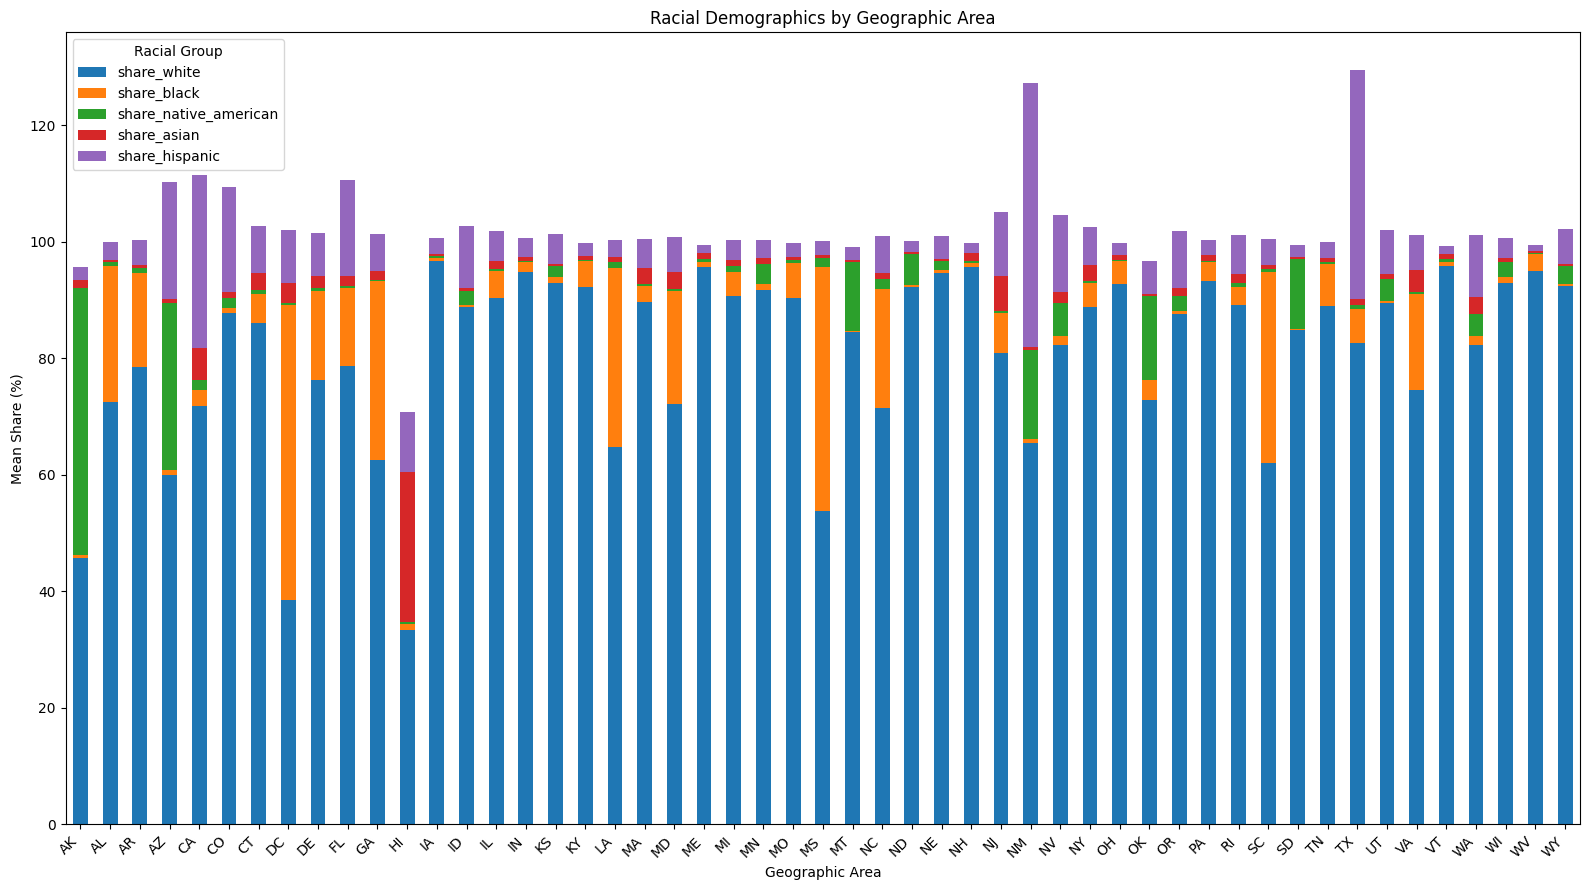

In [24]:
racial.plot(kind='bar', stacked=True, figsize=(16, 9))
plt.title('Racial Demographics by Geographic Area')
plt.xlabel('Geographic Area')
plt.ylabel('Mean Share (%)')
plt.legend(title='Racial Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [25]:
killed = df_fatalities.race.value_counts()
killed

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [26]:
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

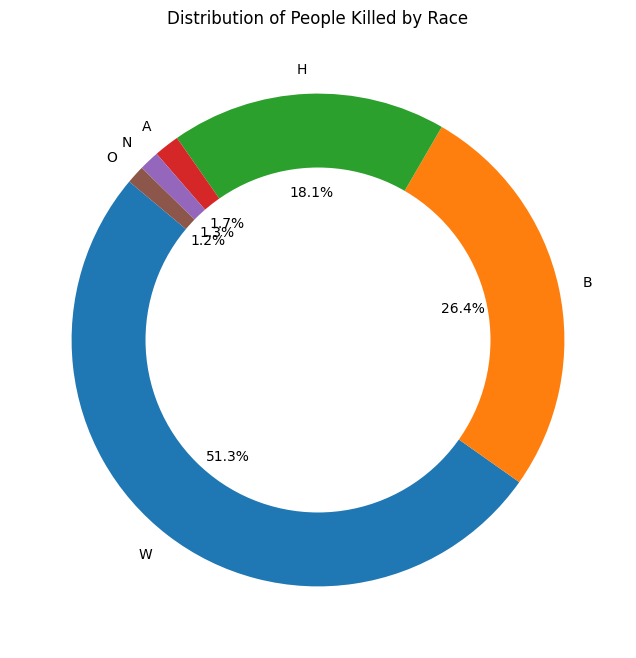

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(killed, labels=killed.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of People Killed by Race')
plt.show()

## Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [28]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender

M    2428
F     107
Name: gender, dtype: int64

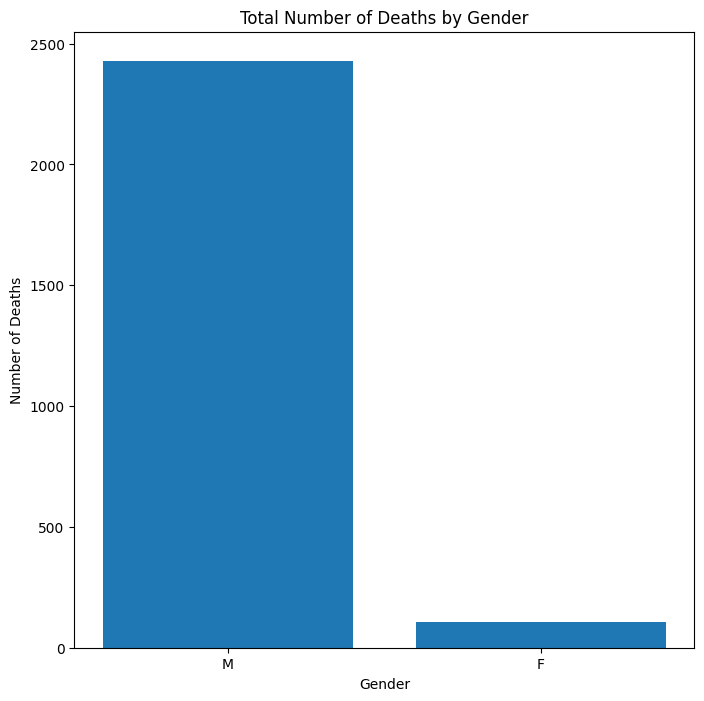

In [29]:
plt.figure(figsize=(8, 8))
plt.bar(killed_gender.index, killed_gender.values)
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()

## Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [30]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]

death_age.head()

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M


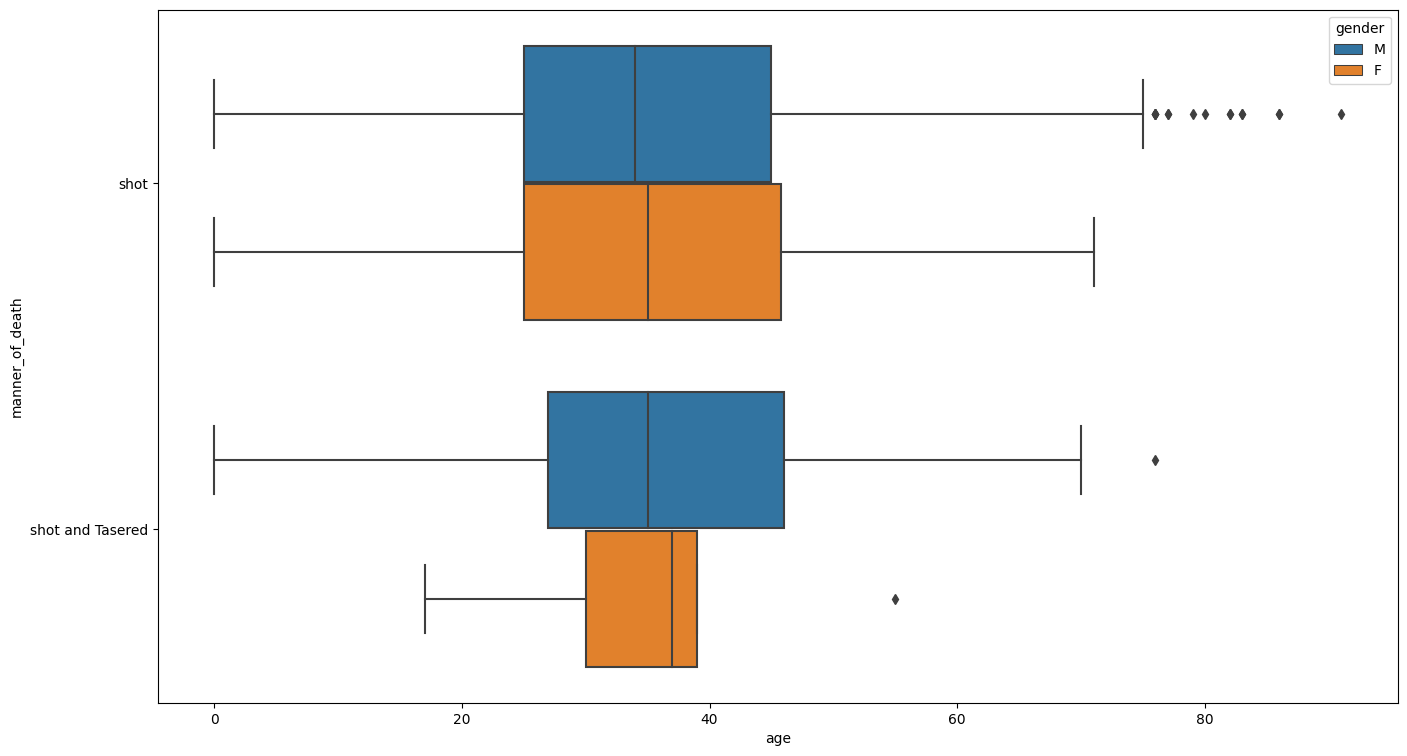

In [31]:
plt.figure(figsize=(16, 9))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

## Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [32]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [33]:
armed = df_fatalities.copy()
armed.loc[armed['armed'] != 'unarmed', 'armed'] = 'armed'

armed.armed.unique()

array(['armed', 'unarmed'], dtype=object)

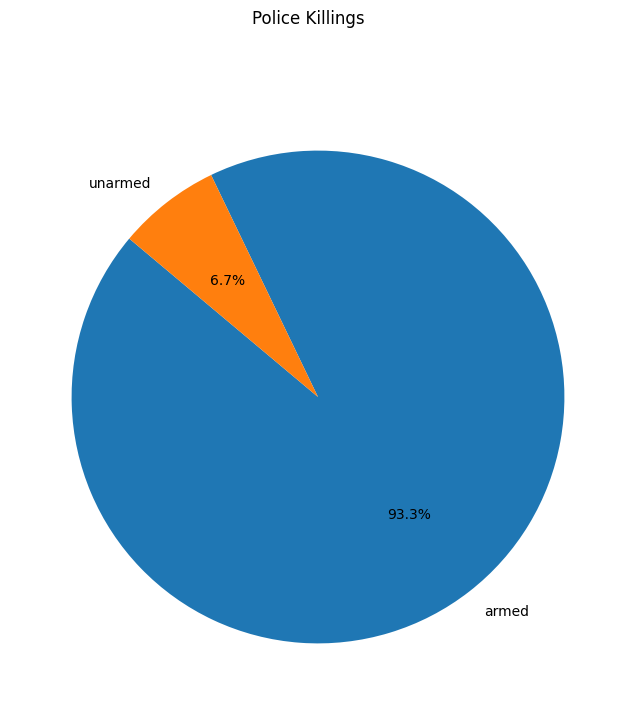

In [34]:
armed_vs_unarmed = armed['armed'].value_counts()

plt.figure(figsize=(8, 8))
plt.suptitle('Police Killings')
plt.pie(armed_vs_unarmed, labels=armed_vs_unarmed.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

plt.show()

In [35]:
arm = df_fatalities.armed.value_counts()
arm

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

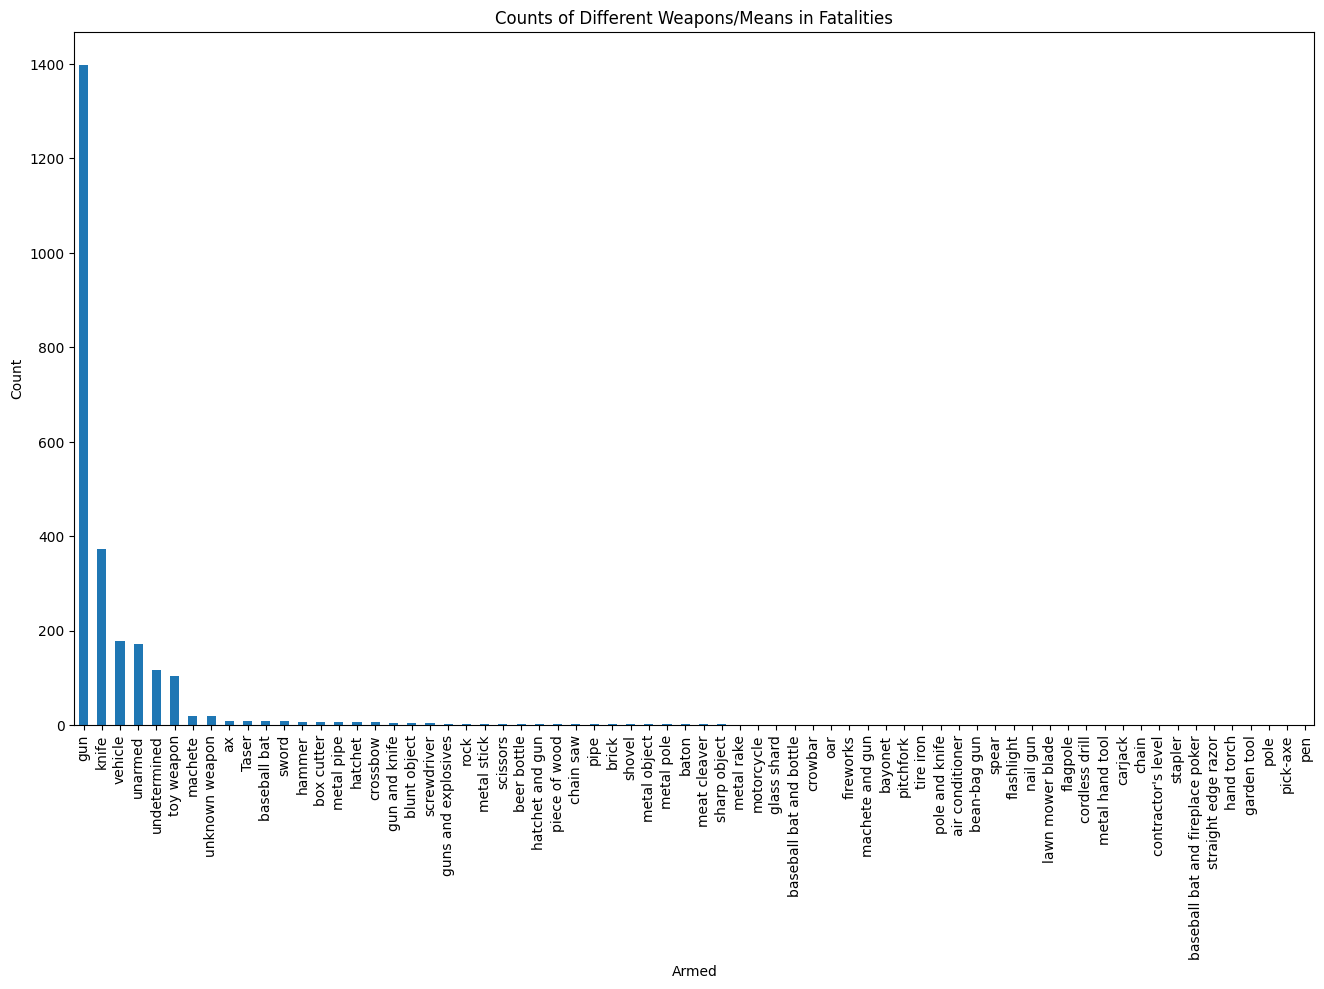

In [36]:
plt.figure(figsize=(16, 9))
arm.plot(kind='bar')
plt.title('Counts of Different Weapons/Means in Fatalities')
plt.xlabel('Armed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:
junior = df_fatalities.loc[df_fatalities['age'] < 25]
under = junior.id.count()

senior = df_fatalities.loc[df_fatalities['age'] > 25]
over = senior.id.count()

print(f"{round((under / over) * 100)}% of people killed were under 25 years old.")

28% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

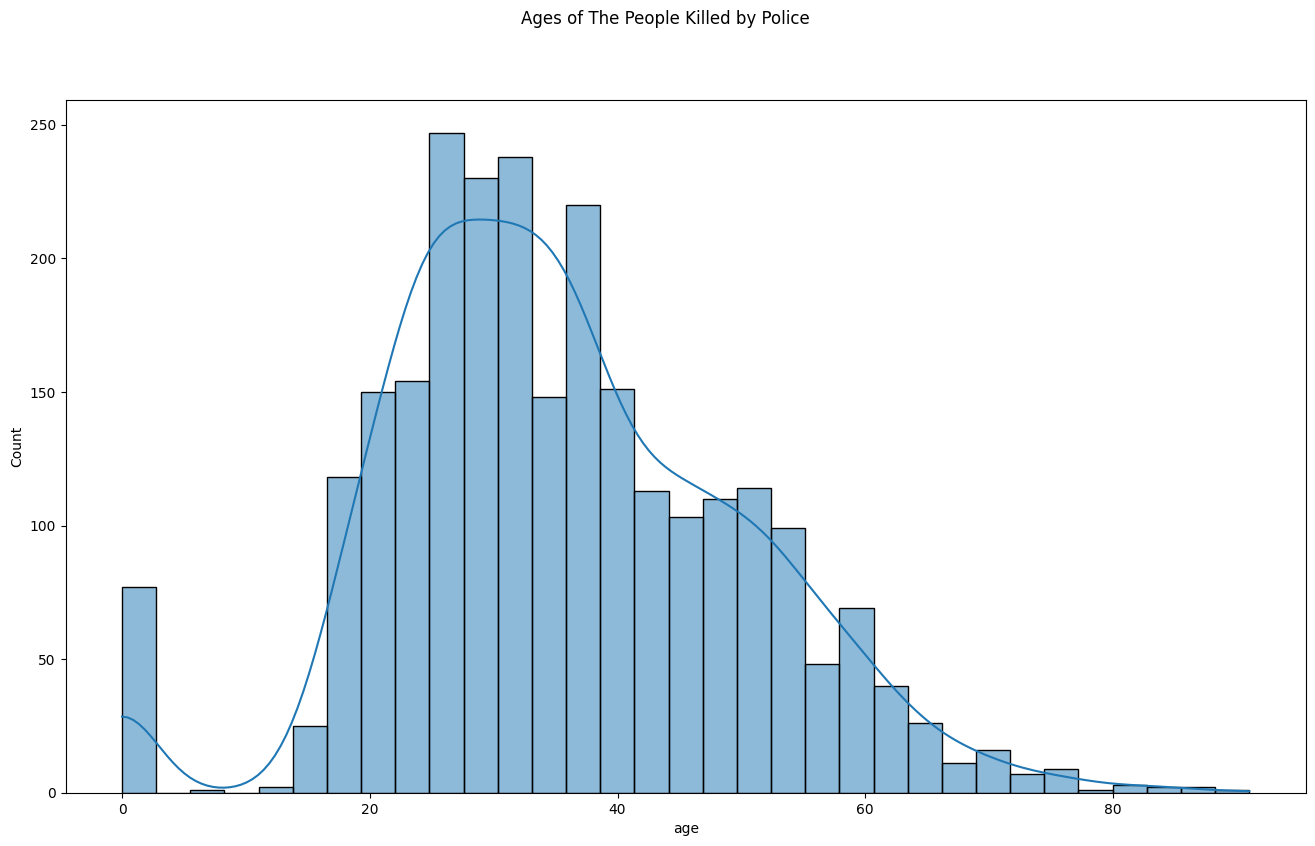

In [38]:
plt.figure(figsize=(16, 9))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

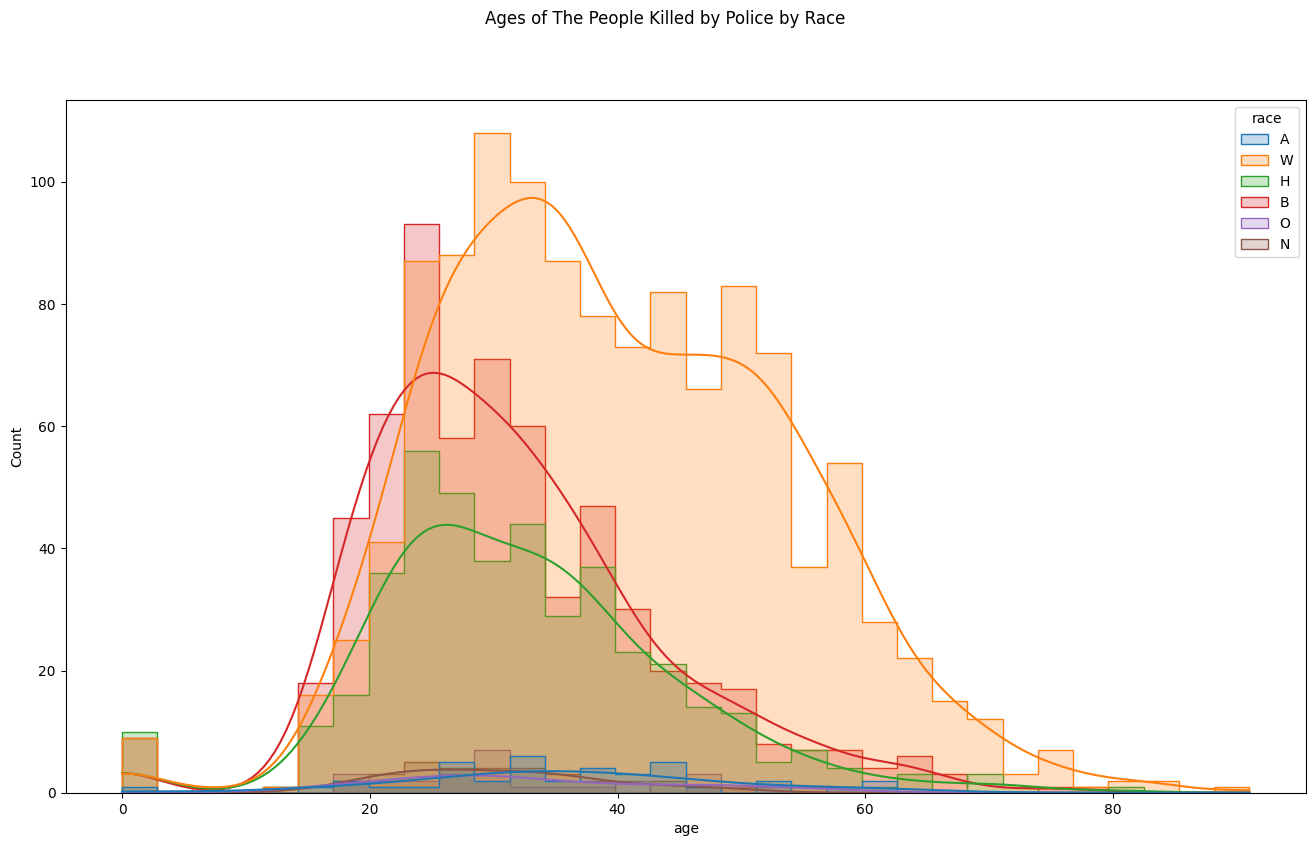

In [39]:
plt.figure(figsize=(16, 9))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='step')
plt.show()

## Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [40]:
race_kill = df_fatalities.race.value_counts()
race_kill

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

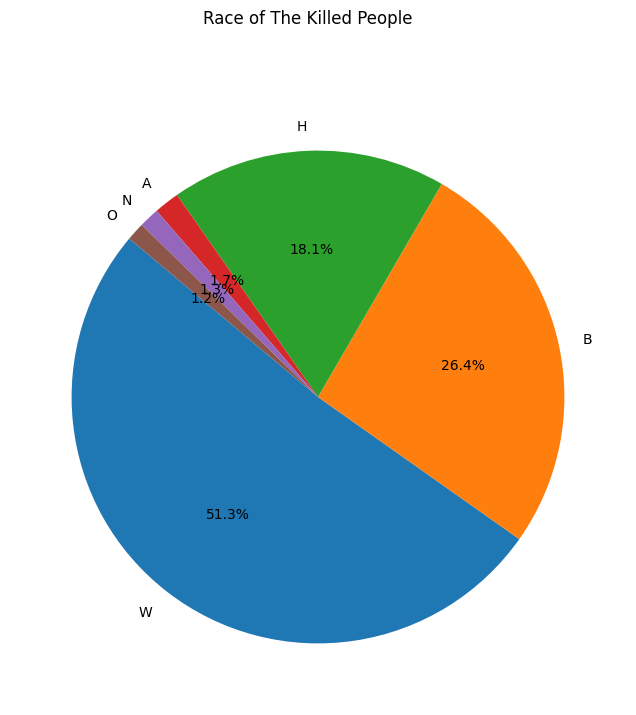

In [41]:
plt.figure(figsize=(8, 8))
plt.suptitle('Race of The Killed People')
plt.pie(race_kill, labels=race_kill.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.show()

## Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [42]:
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

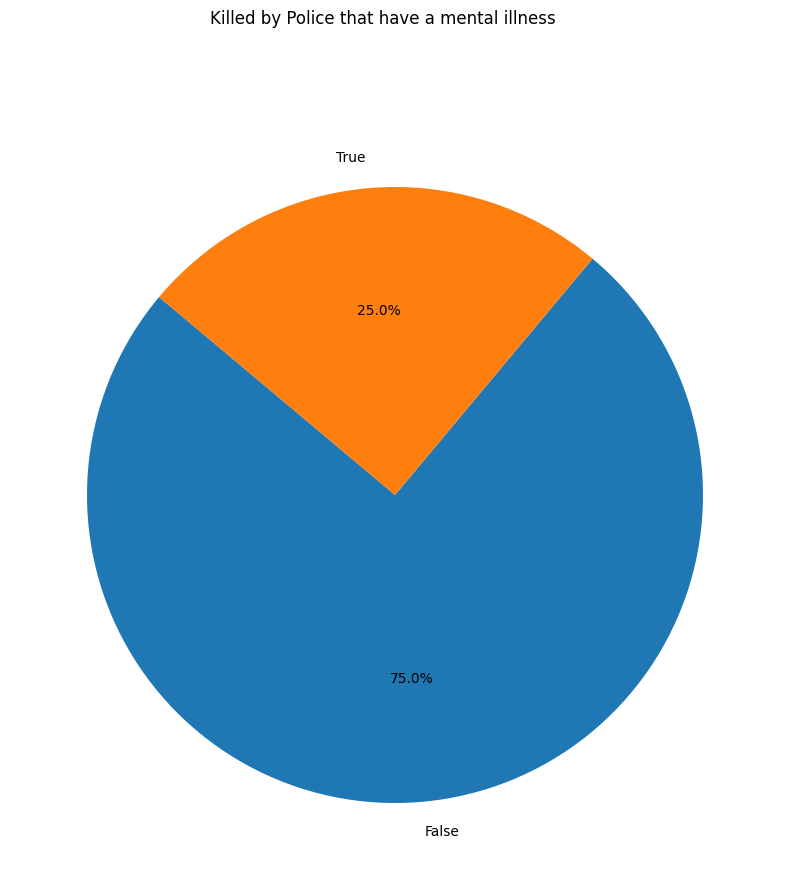

In [43]:
plt.figure(figsize=(10,10))
plt.suptitle('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.show()

## In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [44]:
cities = df_fatalities.city.value_counts().head(10)
cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

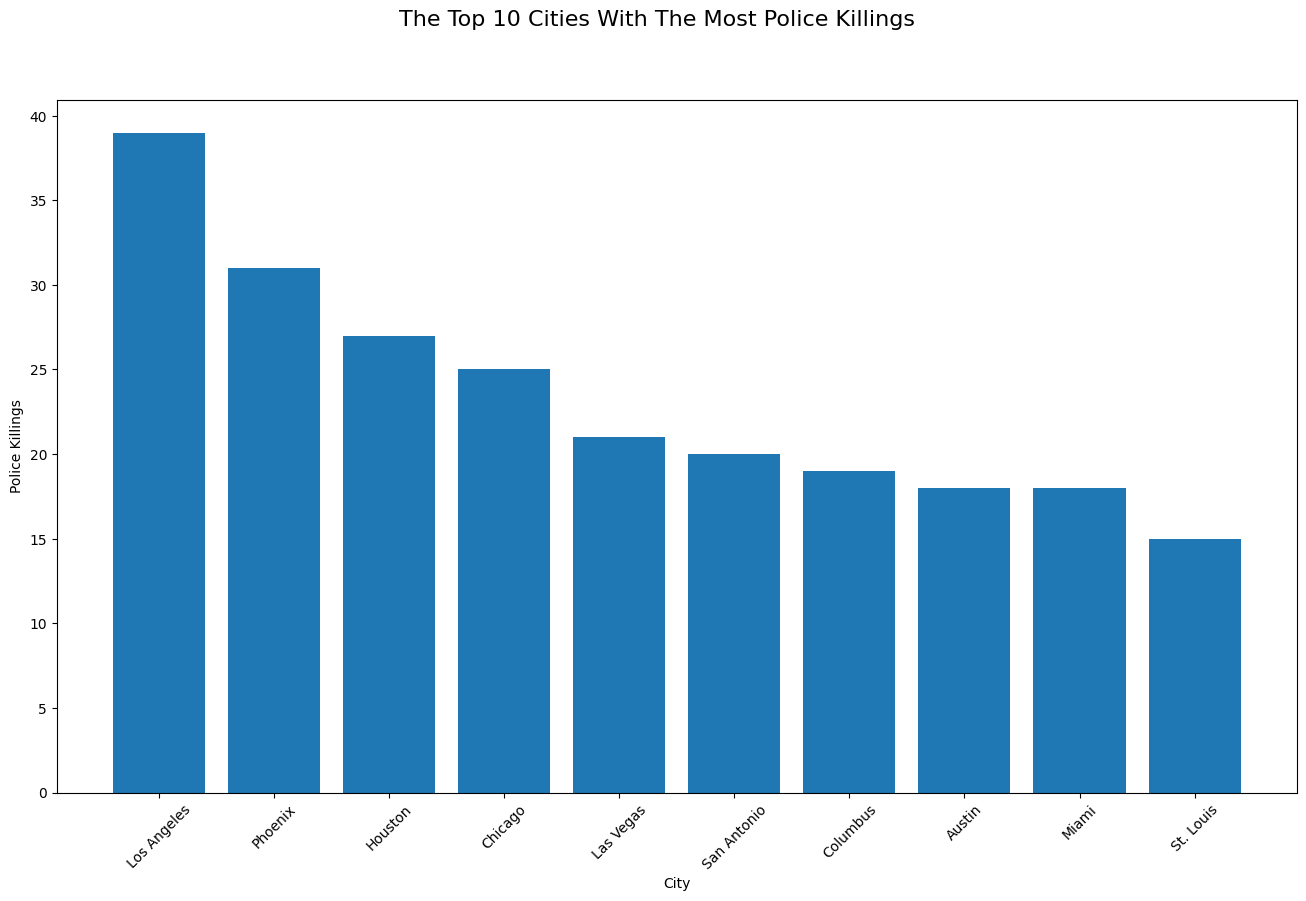

In [45]:
plt.figure(figsize=(16, 9))
plt.suptitle('The Top 10 Cities With The Most Police Killings', fontsize=16)
plt.ylabel('Police Killings')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.bar(cities.index, cities, label=cities.index, linewidth=3)
plt.show()

## Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

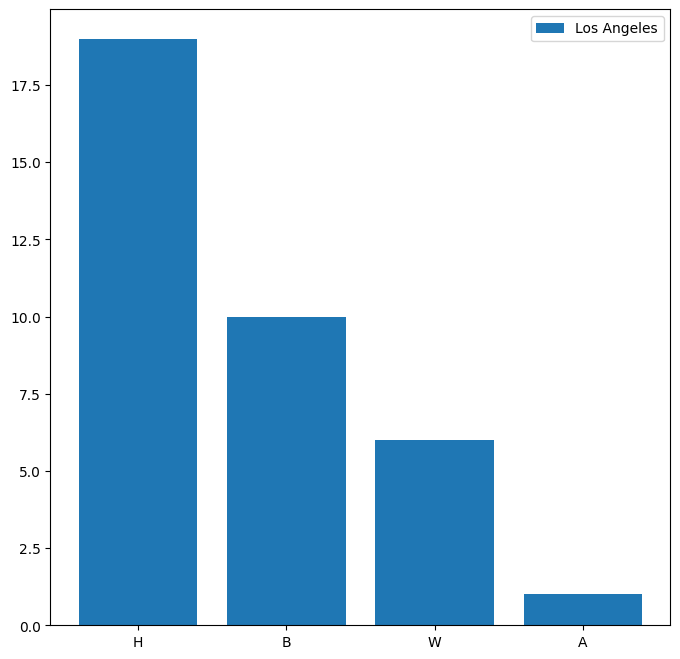

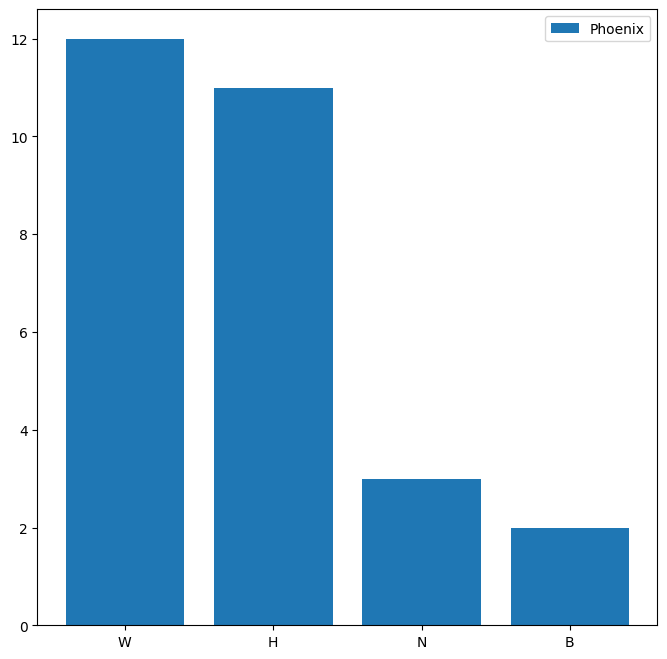

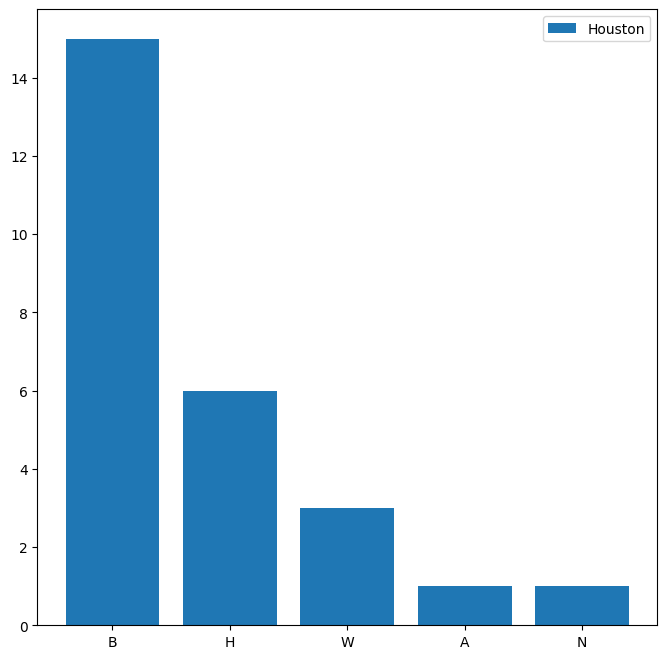

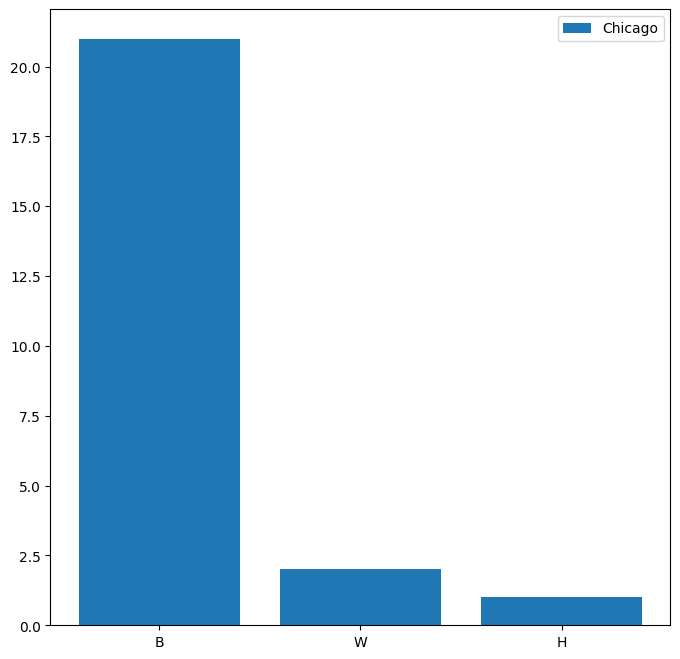

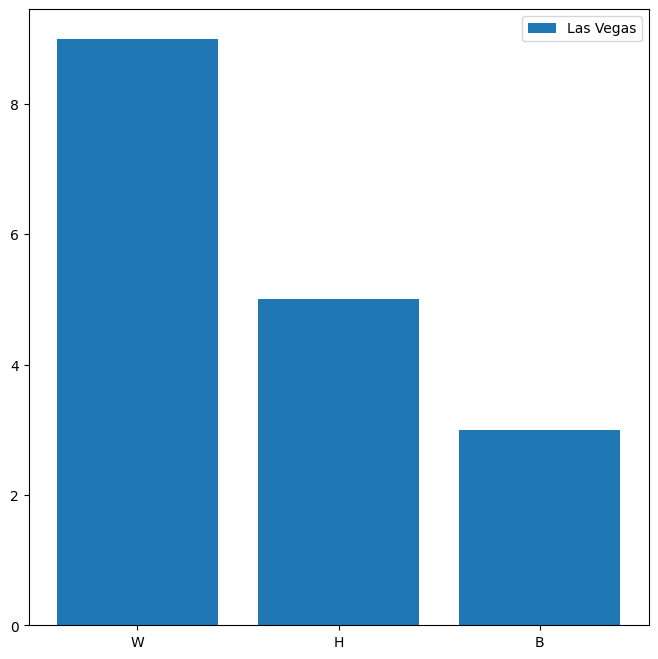

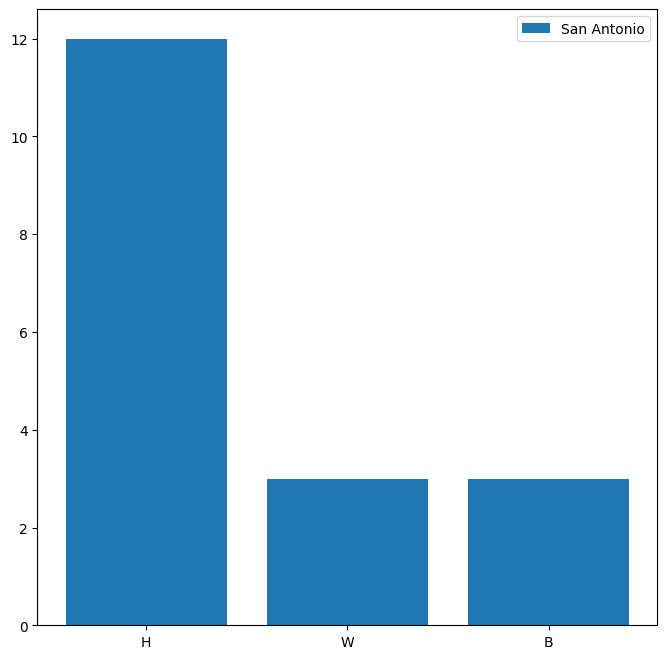

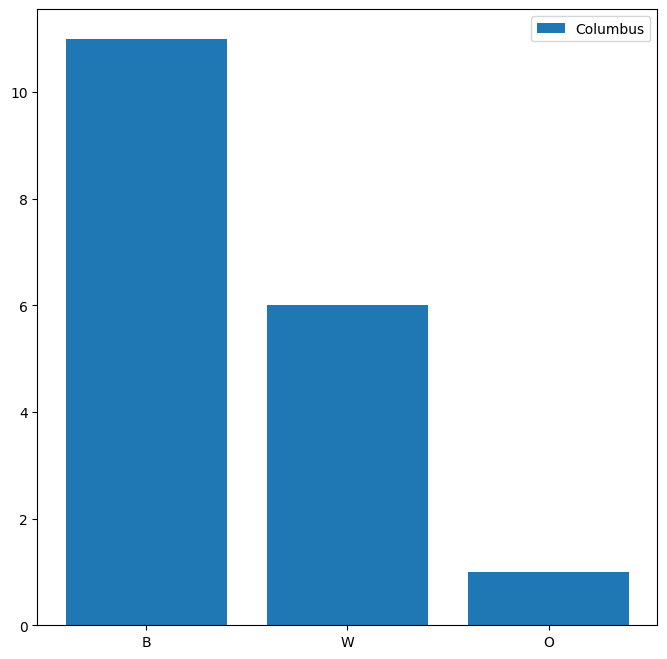

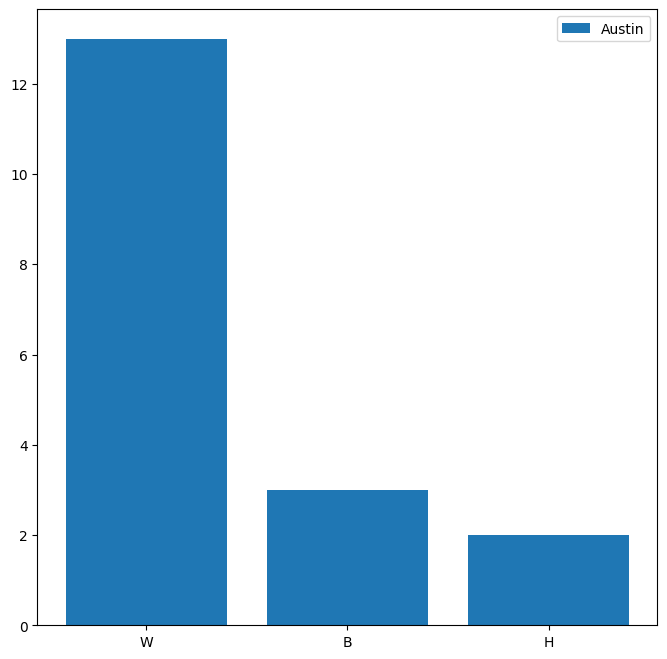

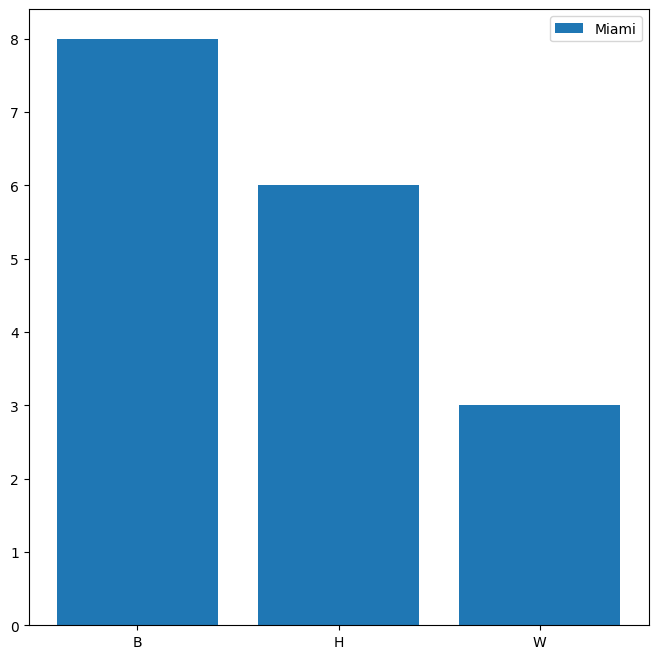

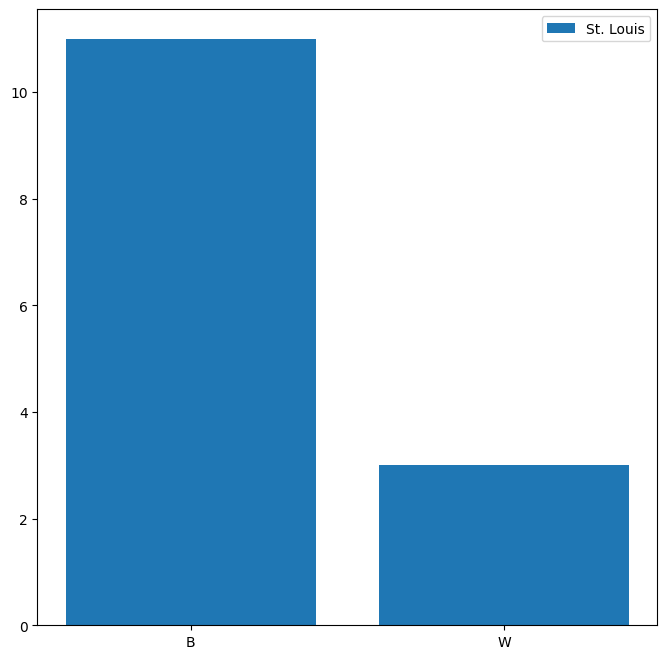

In [46]:
top = df_fatalities[['city', 'race']]
for c in cities.index:
    plt.figure(figsize=(8, 8))
    top_cities = top.loc[top['city'] == c]
    city = top_cities.race.value_counts()
    plt.bar(city.index, city, label=c)
    plt.legend(loc='best')
    plt.show()

## Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [47]:
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_to_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
WI     43
IN     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

In [48]:
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.index,
    z = states_to_map,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa',
)

fig.show()

## Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [49]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date, infer_datetime_format=True).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [50]:
history = monthly_fatalities.groupby('date').size()
history

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

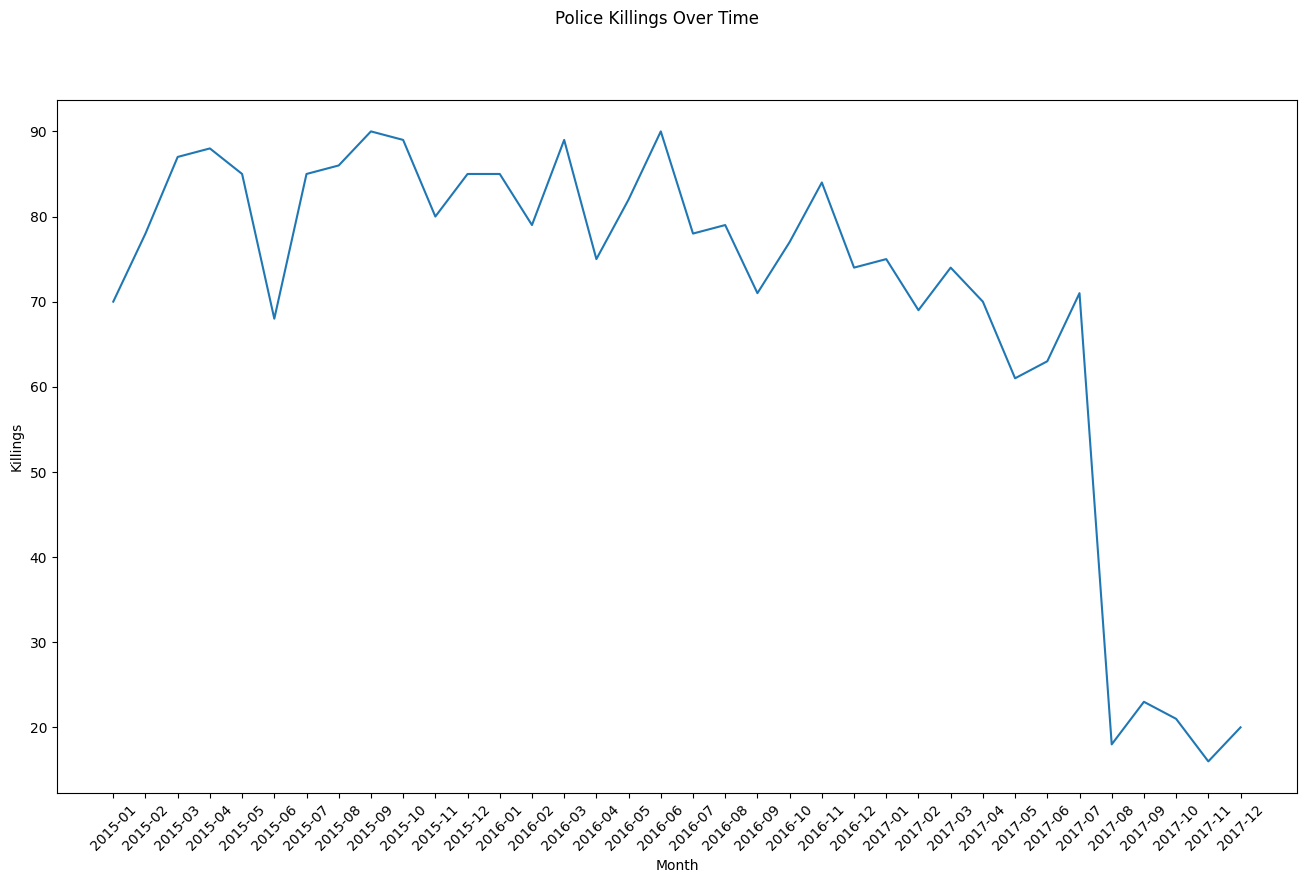

In [51]:
plt.figure(figsize=(16, 9))
plt.plot(history.index, history)
plt.xticks(ticks=history.index, rotation=45)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month')
plt.ylabel('Killings')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).